In [1]:
from mcts_borrowed import MCTS
from utt2 import UTTNode
from tqdm import tqdm
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
import numpy as np

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [3]:
def random_choose(board):
    return board.find_random_child()

def benchmark(n_games, player):
    results = {"Model": 0, "Baseline": 0, "Tie": 0}
    #double_c = {1 : 0, -1:0}
    for i in range(n_games):
        board = UTTNode(current_player=1)
        for i in range(300):
            #player.do_rollout(board)
            #player.do_rollout(board)
            #player.do_rollout(board)
            board = player.choose(board)
            if board.is_terminal():
                #print("a")
                break
            #random_move
            board = board.find_random_child()
            if board.is_terminal():
                #print("b")
                #print(board)
                
                break
        #double_c[board.current_player] =  double_c[board.current_player] +1
        result = board.reward()
        #print(board.current_player)
        if result ==1:
            results["Model"] +=1
        elif result == 0:
            results["Baseline"] += 1
        else:
            results["Tie"]+=1
    #print(double_c)
    return results

In [4]:
def play_game(x, o = None):
    board = UTTNode(current_player=1)
    #while not board.is_terminal():
    
    for i in range(300):
        # You can train as you go, or only at the beginning.
        # Here, we train as we go, doing fifty rollouts each turn.
        x.do_rollout(board)
        board = x.choose(board)
        
        if board.is_terminal():
            #print(board)
            break
        if o is None:
            board = random_choose(board)
        else:
            o.do_rollout(board)
            board = o.choose(board)
        if board.is_terminal():
            #print(board)
            break
    return board.reward()

In [13]:
import numpy as np
def plotting(data, title):
    for key, value in data.items():
        fig = plt.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plt.plot(np.arange(len(value)), value, label = key)
    plt.ylabel("Wins-Losses divided by number of games")
    plt.xlabel("Number of games played")
    plt.legend()
    plt.title(title)

In [6]:
board = UTTNode(current_player=1)

In [7]:
import numpy as np
np.array([2]*9)

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:

n_games = 101
X = MCTS(2, 1)
O = MCTS(2, 1, "norm")
data3 = {"uct": [],"vanilla": []}
for i in tqdm(range(n_games)):
    bench_x = benchmark(50, X)
    bench_o = benchmark(50, O)
    #print(bench_x)
    data3["uct"].append((bench_x["Model"]-bench_x["Baseline"])/50)
    data3["vanilla"].append((bench_o["Model"]-bench_o["Baseline"])/50)
    result = play_game(X)
    result = play_game(O)

100%|██████████| 101/101 [1:22:07<00:00, 48.78s/it]


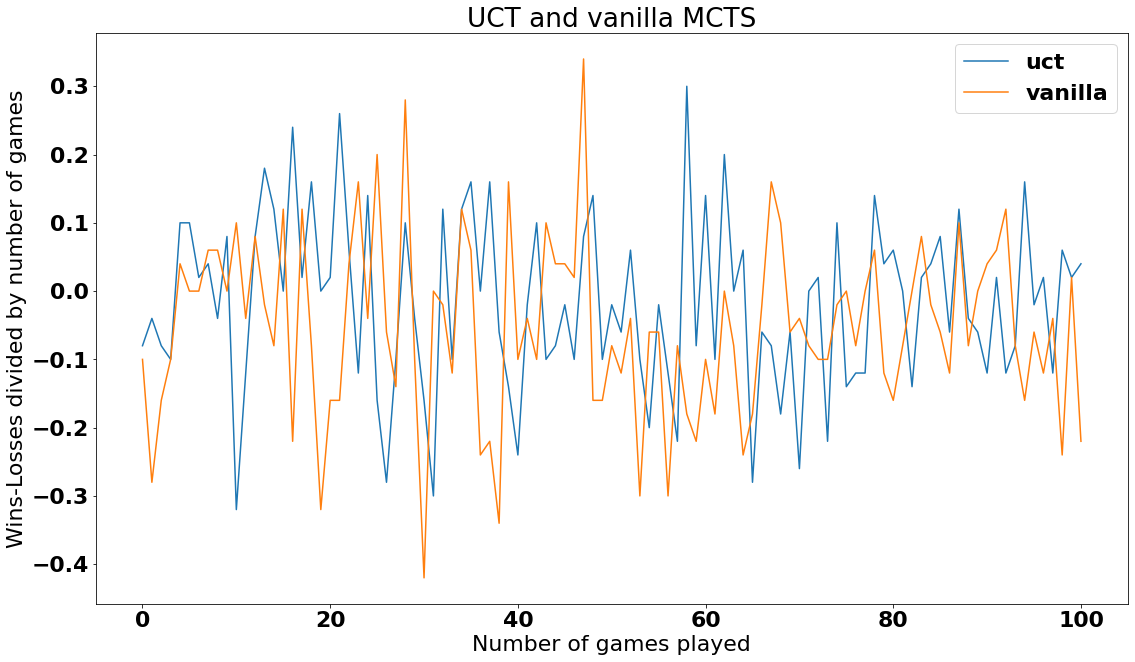

In [16]:
plotting(data3, "UCT and vanilla MCTS")